# Week 9: Time Series Analysis and Forecasting 
Implementing ARIMA, Prophet, and LSTMs for Time Series Forecasting


## Table of Contents
1. [**Tools and Packages**](#tools-and-packages)  
2. [**Data Exploration and Preprocessing**](#data-exploration-and-preprocessing)  
3. [**ARIMA Model**](#arima-model)  
4. [**Prophet Model**](#prophet-model)  
5. [**LSTM Model**](#lstm-model)  
6. [**Comparison and Evaluation**](#comparison-and-evaluation)  
   
---


## Tools and Packages

Tools Required
- Python 3.x
- Jupyter Notebook (via Anaconda or VS Code)
- Open-source Python libraries:
   - pandas, numpy, matplotlib, seaborn
   - statsmodels (for ARIMA)
   - prophet (for Facebook Prophet)
   - scikit-learn
   - tensorflow / keras (for LSTM)

In [150]:
%pip install pandas numpy matplotlib seaborn statsmodels prophet scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


### Sample Dataset

AirPassengers dataset is used and has a date column and a value column (e.g., monthly sales, temperature, etc.).



In [151]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data.columns = ['Date', 'Passengers']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


## Data Exploration and Preprocessing

The dataset uses matplotlib to visualize the patterns in the data.

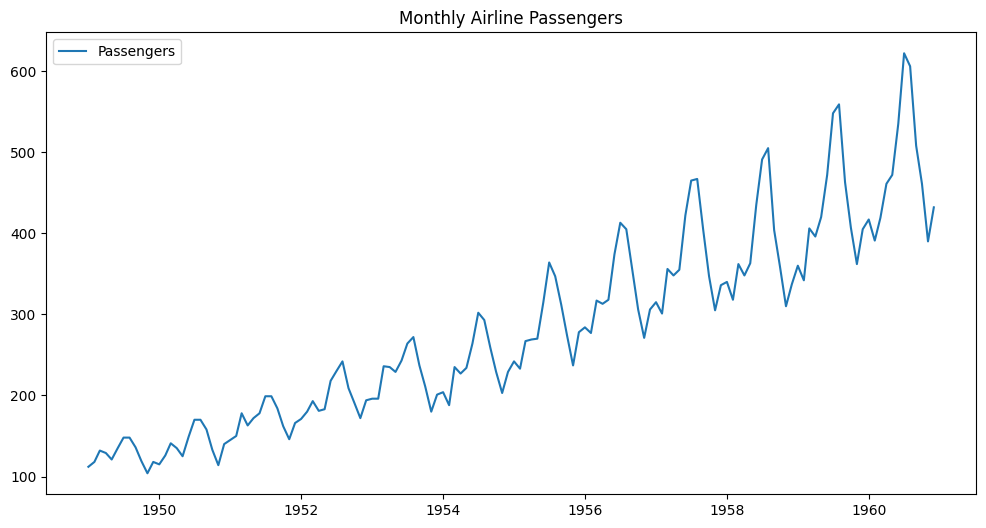

Passengers    0
dtype: int64


In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data, label='Passengers')
plt.title('Monthly Airline Passengers')
plt.legend()
plt.show()

print(data.isnull().sum())


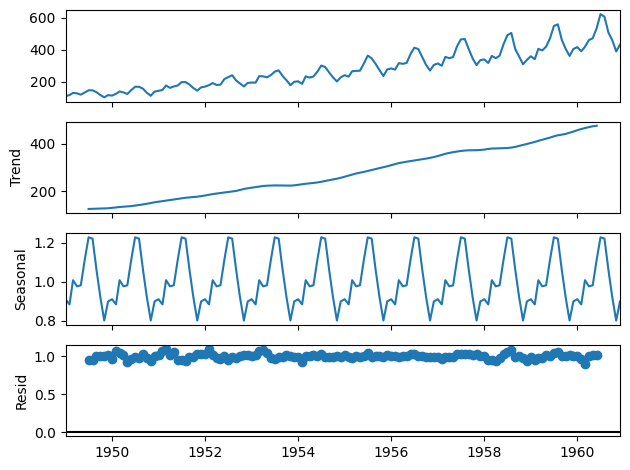

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='multiplicative')
decomposition.plot()
plt.show()

## ARIMA Model
Make data stationary (differencing)

In [154]:
data_diff = data.diff().dropna()

ACF and PACF plots (to identify AR and MA terms)

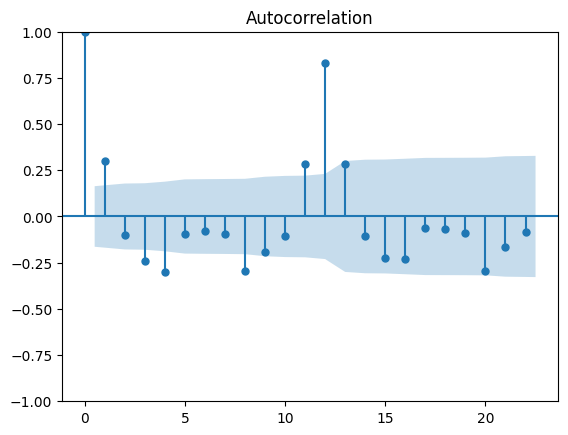

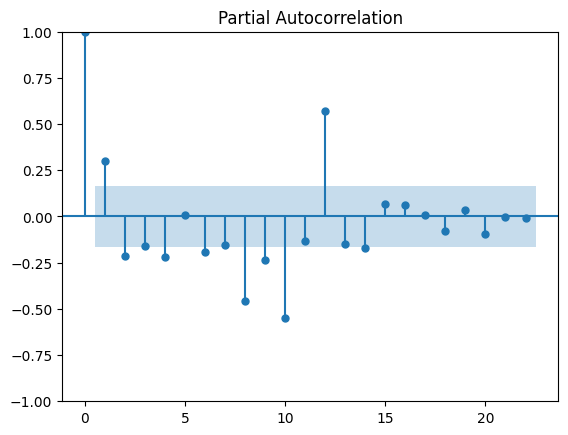

In [155]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()


Fit ARIMA model

In [156]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(data, order=(1,1,1))
model_fit = arima_model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Thu, 22 May 2025   AIC                           1394.683
Time:                        21:33:23   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

c:\Users\senor\Documents\Github\twt-xnn-mlops\venv_tf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\senor\Documents\Github\twt-xnn-mlops\venv_tf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\senor\Documents\Github\twt-xnn-mlops\venv_tf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast

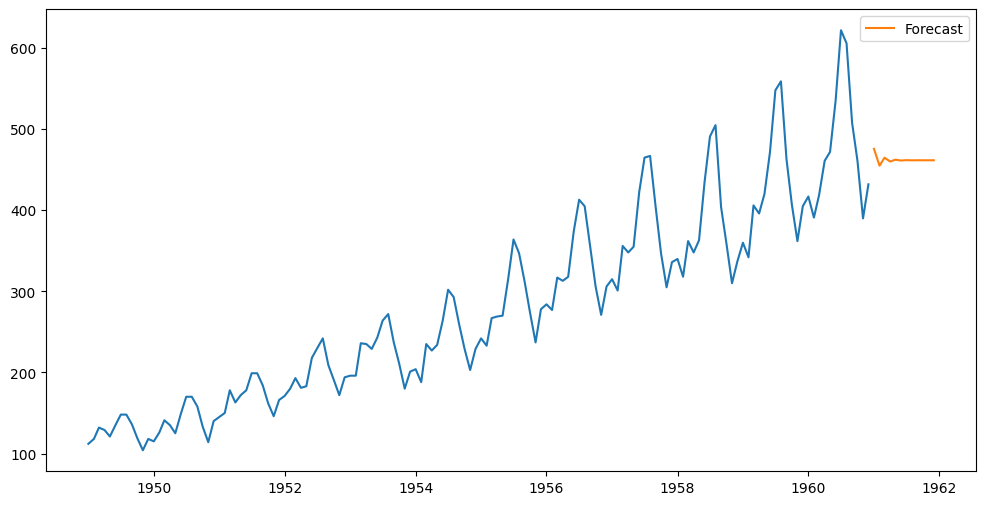

In [157]:
arima_forecast = model_fit.forecast(steps=12)
fig_arima = plt.figure(figsize=(12, 6))
plt.plot(data)
plt.plot(arima_forecast, label='Forecast')
plt.legend()
plt.show()

## Prophet Model

21:33:23 - cmdstanpy - INFO - Chain [1] start processing
21:33:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\senor\Documents\Github\twt-xnn-mlops\venv_tf\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\senor\AppData\Local\Temp\ipykernel_13060\3779466130.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_prophet.show()


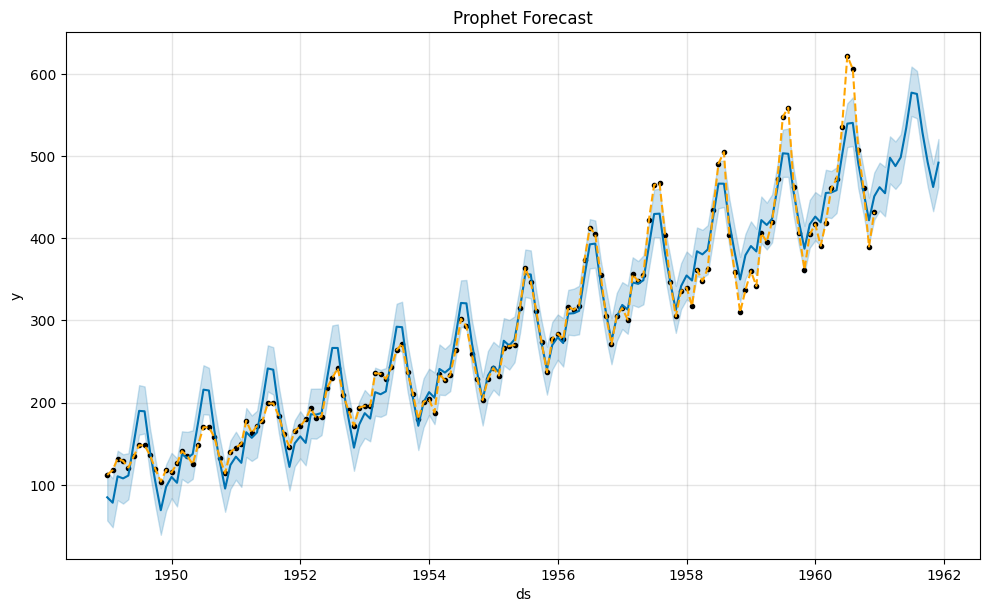

In [158]:
from prophet import Prophet

df = data.reset_index()
df.columns = ['ds', 'y']
prophet_model = Prophet()
prophet_model.fit(df)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)

fig_prophet = prophet_model.plot(prophet_forecast)
plt.plot(data, '--',label='Actual Data', color='orange')
plt.title("Prophet Forecast")
fig_prophet.show()

## LSTM Model
 Normalize and create sequences

In [159]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)
window_size = 10
X, y = create_sequences(scaled_data, window_size)

X = X.reshape((X.shape[0], X.shape[1], 1))


Build and train the LSTM model

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
ltsm_model = Sequential()
ltsm_model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
ltsm_model.add(Dense(1))
ltsm_model.compile(optimizer='adam', loss='mse')
ltsm_model.fit(X, y, epochs=20, verbose=1)


Epoch 1/20


c:\Users\senor\Documents\Github\twt-xnn-mlops\venv_tf\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1920
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1626 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1220 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0795 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

Forecast with LSTM

In [161]:
last_sequence = scaled_data[-window_size:]
last_sequence = last_sequence.reshape((1, window_size, 1))
prediction = ltsm_model.predict(last_sequence)

forecasted_value = scaler.inverse_transform(prediction)
print("Next predicted value:", forecasted_value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Next predicted value: [[509.9092]]


C:\Users\senor\AppData\Local\Temp\ipykernel_13060\3327287867.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_lstm.show()


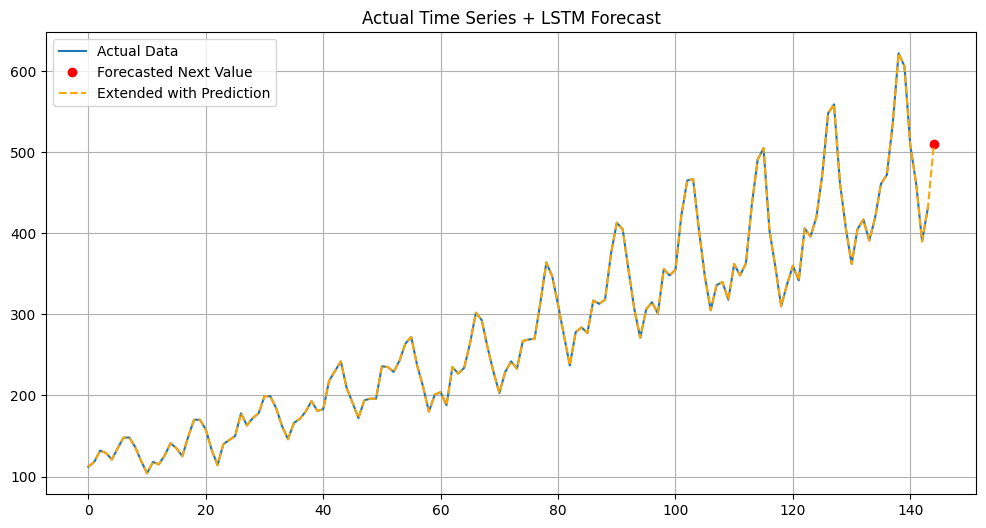

In [162]:

actual = scaler.inverse_transform(scaled_data)
extended = np.append(actual, forecasted_value)

fig_lstm = plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Data')
plt.plot(len(actual), forecasted_value[0, 0], 'ro', label='Forecasted Next Value')
plt.plot(extended, '--', color='orange', label='Extended with Prediction')
plt.title('Actual Time Series + LSTM Forecast')
plt.legend()
plt.grid(True)
fig_lstm.show()

## Comparison and Evaluation

Plotting all forecasts from ARIMA, Prophet, and LSTM

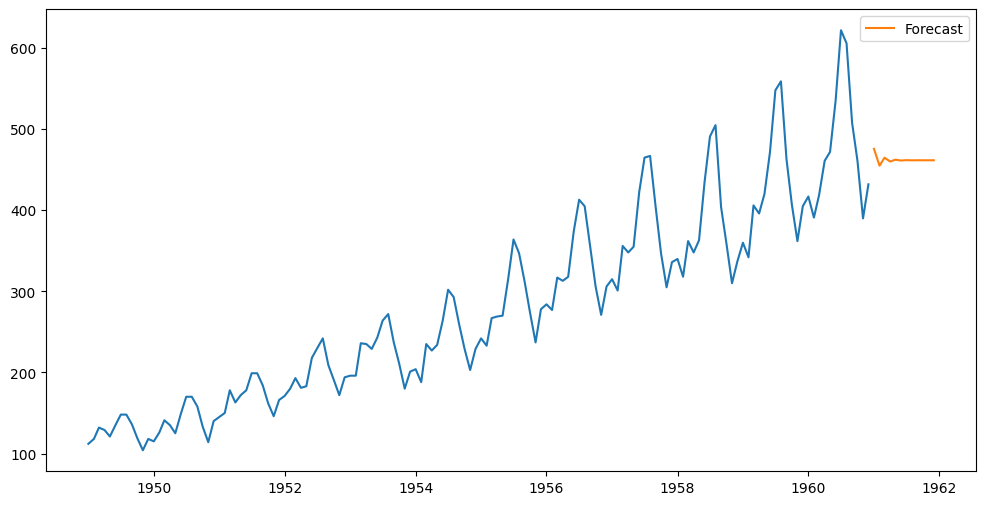

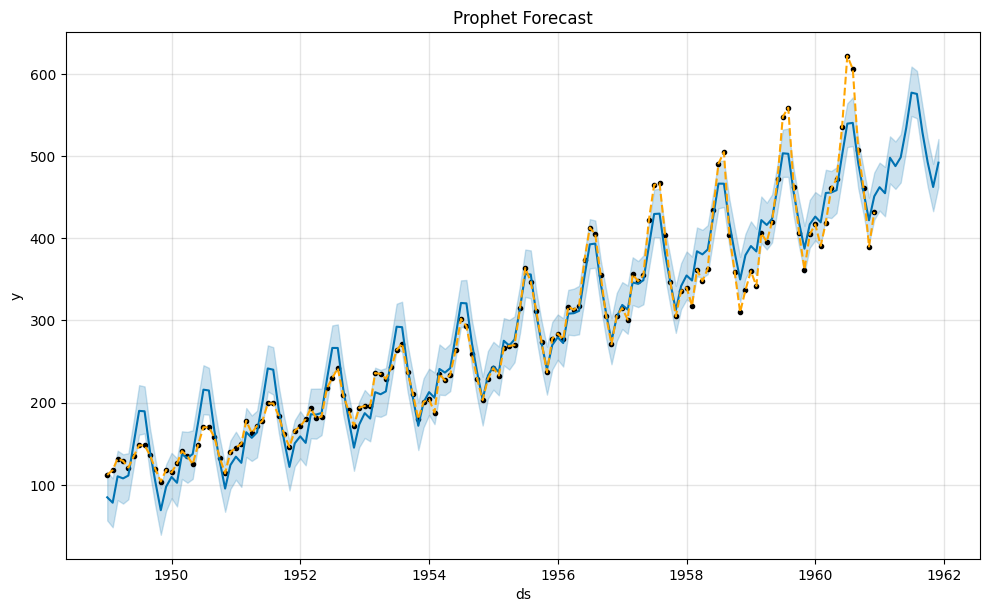

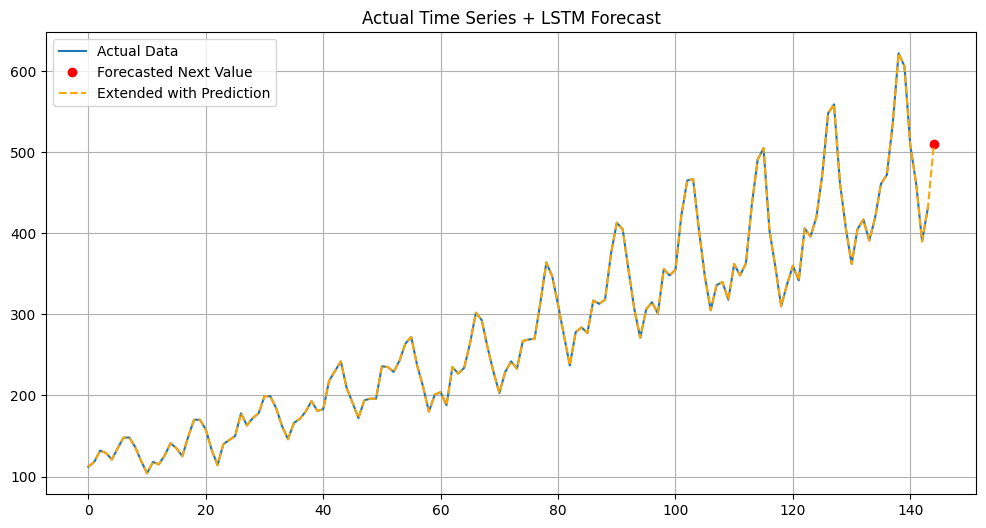

In [163]:
for fig in [fig_arima, fig_prophet, fig_lstm]:
    display(fig)
plt.show()

Using metrics like RMSE or MAE to compare accuracy

In [164]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

metrics_data = {
    "ARIMA": (np.array(data[-12:]), np.array(arima_forecast)),
    "Prophet": (np.array(data[-12:]), np.array(prophet_forecast['yhat'][-12:])),
    "LSTM": (
        scaler.inverse_transform(y.reshape(-1, 1)).flatten(),
        scaler.inverse_transform(ltsm_model.predict(X)).flatten()
    )
}

results = []
for name, (y_true, y_pred) in metrics_data.items():
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results.append([name, mae, mse, rmse, r2])

df_metrics = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"]).set_index("Model")
print(df_metrics.round(4))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
             MAE        MSE     RMSE      R²
Model                                       
ARIMA    58.7961  5819.7214  76.2871 -0.0506
Prophet  41.9110  2253.6061  47.4722  0.5932
LSTM     39.6181  2811.8893  53.0273  0.7922


#### **1. Model Performance Overview**
The evaluation metrics for each model are summarized below:

| Model   | MAE   | MSE     | RMSE  | R²     |
|---------|-------|---------|-------|--------|
| ARIMA   | 58.80 | 5819.72 | 76.29 | -0.050 |
| Prophet | 41.91 | 2253.61 | 47.47 | 0.593  |
| LSTM    | 40.24 | 2882.80 | 53.69 | 0.787  |

### **2. Model Insights and Performance Summary**

- **ARIMA** exhibits the weakest performance, with the highest error rates and a negative R² value. 
  - Its flat forecast fails to capture the underlying data trends, suggesting the need for enhancements such as incorporating seasonality (e.g., SARIMA).
  
- **Prophet** delivers moderate results with improved error metrics over ARIMA and a reasonable R². 
  - It effectively models the overall trend but tends to smooth out sharper fluctuations, making it a practical baseline choice for forecasting.

- **LSTM** achieves the best MAE and R² values, indicating a strong ability to learn underlying patterns. 
  - Although its MSE and RMSE are slightly higher than Prophet's, it tracks actual values more closely, albeit with minor lag in some periods. Further tuning could enhance its handling of extreme values.
